# **Suicidal-Text-Analysis**

The suicide rate of patients with depression has been increasing in recent years. We trained this model by analyzing 232,074 pieces of text data. It is a machine learning-based algorithm for text classification and a computational method for semantic sentiment analysis. The experimental results show that it can effectively predict the sentiment of depression patients' blog posts on social media such as Twitter or Facebook. This allows physicians to intervene in advance when a depressed patient attempts to harm himself.

Step 1: We are read the dataset called "Suicide_Detection"

In [73]:
import pandas as pd

In [74]:
data = pd.read_csv('Data/stress.csv')
print(data.head())
print()

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

Step 2: Check the dataset

In [75]:
print(f"Data shape {data.shape}")

print(f"Number of Unique Elements: {len(data['text'].unique())}")

Data shape (2838, 116)
Number of Unique Elements: 2820


In [76]:
import nltk
import re
import string
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords

stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


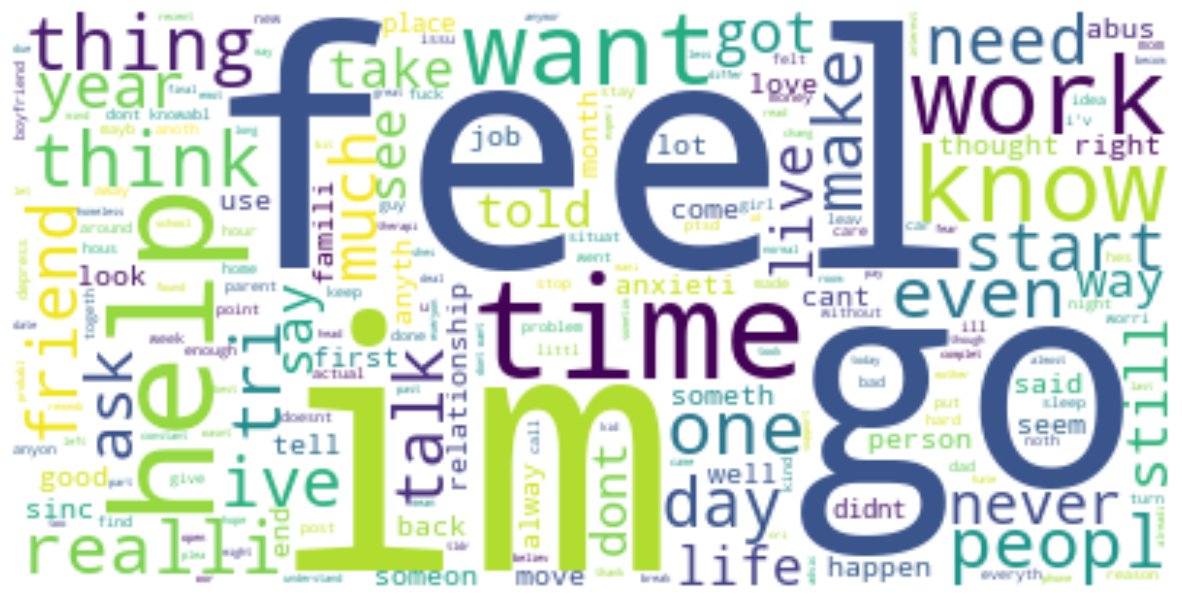

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
data["label"]=data["label"].map({0:"Stressed",1:"Not Stressed"})
data=data[["text","label"]]
data

,text,label
0,said felt way sugget go rest trigger ahead you...,Not Stressed
1,hey rassist sure right place post goe im curr...,Stressed
2,mom hit newspap shock would know dont like pla...,Not Stressed
3,met new boyfriend amaz kind sweet good student...,Not Stressed
4,octob domest violenc awar month domest violenc...,Not Stressed
...,...,...
2833,week ago precious ignor jan happi year prec...,Stressed
2834,dont abil cope anymor im tri lot thing trigger...,Not Stressed
2835,case first time your read post look peopl will...,Stressed
2836,find normal good relationship main problem see...,Stressed


In [61]:
# Separate features and target
X = data['text']
y = data['label'].map({0:"Not Stressed",1:"Stressed"})

data=data["text",]


In [62]:
data

,text,label
0,said felt way sugget go rest trigger ahead you...,NaN
1,hey rassist sure right place post goe im curr...,NaN
2,mom hit newspap shock would know dont like pla...,NaN
3,met new boyfriend amaz kind sweet good student...,NaN
4,octob domest violenc awar month domest violenc...,NaN
...,...,...
2833,week ago precious ignor jan happi year prec...,NaN
2834,dont abil cope anymor im tri lot thing trigger...,NaN
2835,case first time your read post look peopl will...,NaN
2836,find normal good relationship main problem see...,NaN


In [79]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Convert the 'text' and 'label' columns to numpy arrays
x = np.array(data["text"])
y = np.array(data["label"])

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data to a matrix of token counts
X = cv.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Test with new documents
docs_new = ['I am stressed', 'I don’t have stress']
X_new_counts = cv.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print(f'{doc} -> {category}')


              precision    recall  f1-score   support

Not Stressed       0.70      0.86      0.77       438
    Stressed       0.81      0.61      0.69       414

    accuracy                           0.74       852
   macro avg       0.75      0.74      0.73       852
weighted avg       0.75      0.74      0.73       852

I am stressed -> Stressed
I don’t have stress -> Not Stressed


In [81]:
import joblib

filename = 'finalized_model2.sav'
joblib.dump(clf, filename)

['finalized_model2.sav']

Step 3: The dataset is selected and divided into training set and testing set

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(labels=['label', 'text' ], axis=1)
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

Step 4: Perform feature extraction on the data of the training set. CountVectorizer is transform a given text into a vector on the basis of the count of each word that occurs in the entire text.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Keep the 'text' column for vectorization, drop only the 'label' column
X = data.drop(labels=['label'], axis=1)
y = data['label'].map({0:"Not Stressed",1:"Stressed"})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

# Initialize CountVectorizer
count_vect = CountVectorizer()

# Fit and transform the training data
x_train_counts = count_vect.fit_transform(x_train['text'])

# Print the shape of the transformed data
print(x_train_counts.shape)

# Print the vocabulary entry for the word 'disaster'
print(f"vocab => {count_vect.vocabulary_.get(u'disaster')}")


(2128, 10058)
vocab => 2708


Step 5: Perform feature extraction on the data of the training set. Tfidftransformer will compute word counts using CountVectorizer and then compute the IDF values and only then compute the Tf-idf scores

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
X_train_tfidf.shape

(2128, 10058)

Step 6: To classification of feature vectors in training sets by naive Bayes algorithm

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

We try a little demo with two values to see if the model works

In [26]:
docs_new = ['I am stressed', 'I dont have stress']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print(f'{doc} -> {category}')

I am stressed -> Stressed
I dont have stress -> Stressed


Luckily, it does.

Step 7: Call fit() to train and predict the algorithm model in the pipeline

In [27]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(x_train['text'], y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Step 8: Visualize confusion matrix to analyze the results of train

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
def print_confusion_matrix(model,
                           confusion_matrix,
                           figsize = (8,8),
                           fontsize=12,
                           ylabel='True label',
                           xlabel='Predicted label'):


    class_names = model.classes_
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)


accuracy:-> 0.6633802816901408
              precision    recall  f1-score   support

           0       0.91      0.32      0.47       335
           1       0.61      0.97      0.75       375

    accuracy                           0.66       710
   macro avg       0.76      0.65      0.61       710
weighted avg       0.75      0.66      0.62       710



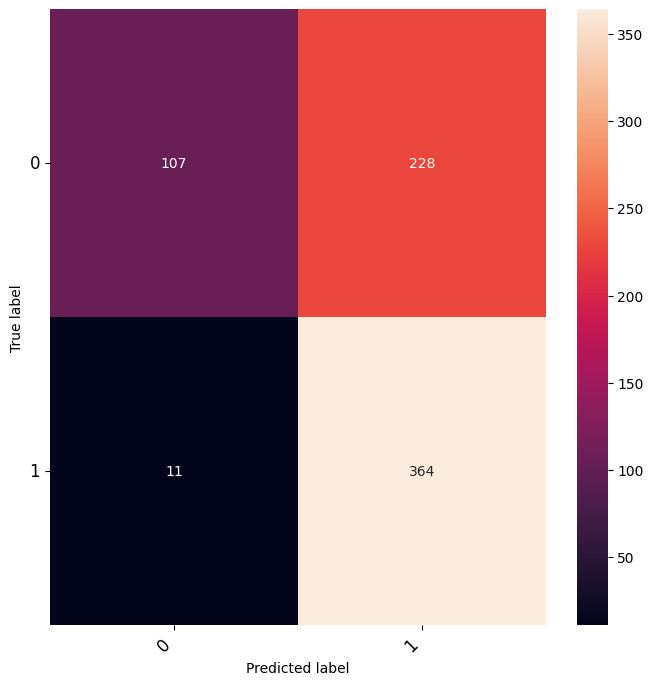

In [15]:
print(f"accuracy:-> {text_clf.score(x_test['text'],y_test)}")


from sklearn import metrics

docs_test = x_test['text']
predicted = text_clf.predict(docs_test)

print(metrics.classification_report(y_test, predicted ))

# print(metrics.confusion_matrix(y_test, predicted))

cm = metrics.confusion_matrix(y_test, predicted, labels=text_clf.classes_)

print_confusion_matrix(text_clf,confusion_matrix=cm)

Step 9: Classify data using stochastic gradient descent

In [16]:
from sklearn.linear_model import SGDClassifier
text_clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=.0001, random_state=42,
                          max_iter=5, tol=None)),
])




Step 10: Visualize the results of stochastic gradient descent classification

accuracy:-> 0.7464788732394366
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       335
           1       0.75      0.79      0.77       375

    accuracy                           0.75       710
   macro avg       0.75      0.74      0.74       710
weighted avg       0.75      0.75      0.75       710



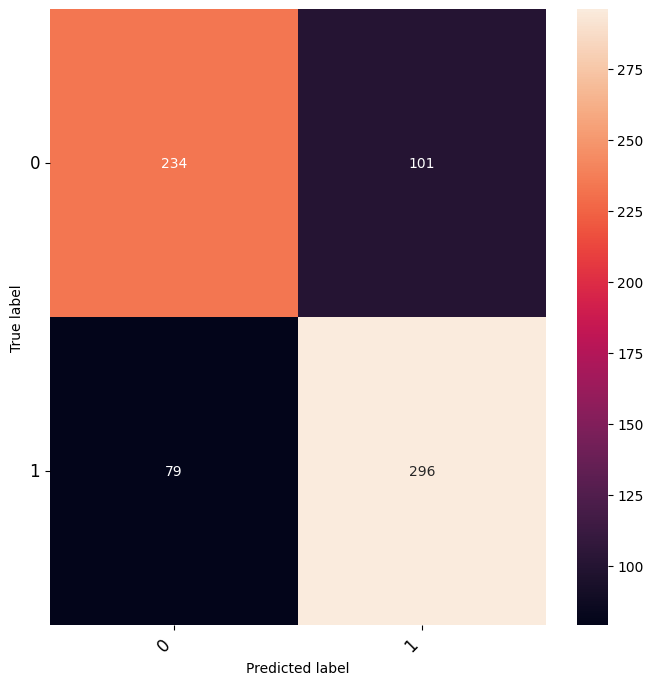

In [17]:
text_clf2.fit(x_train['text'], y_train)

predicted = text_clf2.predict(docs_test)
print (f"accuracy:-> {text_clf2.score(x_test['text'],y_test)}")


print(metrics.classification_report(y_test, predicted ))
# print(metrics.confusion_matrix(y_test, predicted))


cm = metrics.confusion_matrix(y_test, predicted, labels=text_clf2.classes_)

print_confusion_matrix(text_clf2,confusion_matrix=cm)

We Thereby can see that **text_clf2** gives us a better prediction. So we use it as out model of choice

In [18]:
best_model = text_clf2

We then export the model as an `.sav` file and use it for our web application as you will see. We have decided to use streamlit for easy of use.

In [19]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']